In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from datetime import datetime

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_data = pd.read_csv("yds_train2018.csv")
print(train_data.columns)

test_data = pd.read_csv("yds_test2018.csv")
print(test_data.columns)

holidays = pd.read_excel("holidays.xlsx")
print(holidays.columns)

promotional_expense = pd.read_csv("promotional_expense.csv")
print(promotional_expense.columns)

Index(['S_No', 'Year', 'Month', 'Week', 'Merchant_ID', 'Product_ID', 'Country',
       'Sales'],
      dtype='object')
Index(['S_No', 'Year', 'Month', 'Product_ID', 'Country', 'Sales'], dtype='object')
Index(['Date', 'Country', 'Holiday'], dtype='object')
Index(['Year', 'Month', 'Country', 'Product_Type', 'Expense_Price'], dtype='object')


In [4]:
test_data.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,NaN
1,79074,2016,5,1,Argentina,NaN
2,79075,2016,6,1,Argentina,NaN
3,79076,2016,7,1,Argentina,NaN
4,79077,2016,8,1,Argentina,NaN


In [ ]:
train_grouped["Sales"] = train_data.groupby(["Year", "Month", "Product_ID", "Country"])["Sales"].sum()

In [6]:
new_test_data = pd.DataFrame()

for index, item in test_data.iterrows():  
    Merchant_Ids = train_data[(train_data.Product_ID == item.Product_ID ) & (train_data.Country == item.Country) & (train_data.Year >= item.Year -1)]["Merchant_ID"].unique()
    temp_df = pd.DataFrame([item]* len(Merchant_Ids))
    temp_df["Merchant_ID"] = Merchant_Ids
    new_test_data = new_test_data.append(temp_df, ignore_index=True)

new_test_data["Month"] = new_test_data.Month.astype("int8")
new_test_data["Year"] = new_test_data.Year.astype("int16")
new_test_data["S_No"] = new_test_data.S_No.astype("int32")
new_test_data["Product_ID"] = new_test_data.Product_ID.astype("int32")

new_test_data.to_csv("new_test_data.csv")
new_test_data.head()

,S_No,Year,Month,Product_ID,Country,Sales,Merchant_ID
0,79073,2016,4,1,Argentina,NaN,ar00003
1,79073,2016,4,1,Argentina,NaN,ar00007
2,79073,2016,4,1,Argentina,NaN,ar000010
3,79073,2016,4,1,Argentina,NaN,ar000011
4,79073,2016,4,1,Argentina,NaN,ar000012


In [ ]:
train_data.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B1A263518>]],
      dtype=object)

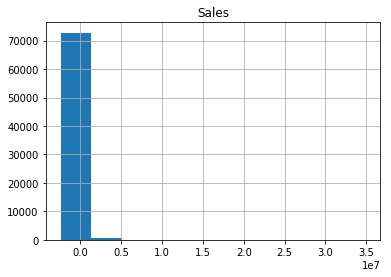

In [28]:
logtrain_data.hist(column='Sales')

In [ ]:
country_wise_merchants = train_data.groupby(["Merchant_ID", "Country"]).count().dropna().reset_index(level=[0,1]).groupby(["Country"])["Merchant_ID"]

In [ ]:
tmp_df = train_data.groupby(["Merchant_ID", "Country"]).count().dropna().reset_index(level=[0,1])[["Merchant_ID", "Country"]]

In [ ]:
tmp_df.join(test_data)

In [ ]:
pd.concat(test_data, tmp_df)

In [ ]:
cwm = pd.DataFrame({"Country"})
for i, d in country_wise_merchants:
    cwm
    print("data" + d)

In [ ]:
train_data.groupby(["Year", "Month", "Product_ID", "Country"])[["Year", "Month", "Product_ID", "Country"]].bfill()

In [7]:
promotional_expense = promotional_expense.rename(columns={"Product_Type": "Product_ID"})

In [8]:
train_data = train_data.merge(promotional_expense)
new_test_data = new_test_data.merge(promotional_expense)

In [ ]:
def parse_date(item):
    return datetime.strptime(item, '%Y, %m, %d')

holidays['parsedDate'] = holidays['Date'].apply(parse_date)

In [ ]:
holidays_filtered = holidays[["parsedDate", "Country"]]

In [ ]:
train_data['Holiday'] = False
test_data['Holiday'] = False

In [ ]:
holidays_filtered.iloc[0].parsedDate.year

In [ ]:
holidays_filtered.head()

In [ ]:
# pd.DatetimeIndex(holidays_filtered['parsedDate']).week ==train_data.Week

In [ ]:
len(train_data)

In [ ]:
test_data['Holiday'] = False

In [ ]:
def isHoliday(item):
    for index, holiday in holidays_filtered.iterrows():
        if (holiday.parsedDate.week == item.Week) and (holiday.Country == item['Country']):
            return True
        else:
            return False

train_data['Holiday'] = train_data.apply(isHoliday, axis=1, reduce=True)
test_data['Holiday'] = test_data.apply(isHoliday, axis=1, reduce=True)

In [ ]:
sum(train_data.Holiday == True)
#sum(test_data.Holiday == True)

In [14]:
from sklearn.preprocessing import LabelEncoder

country_encoder = LabelEncoder()
country_encoder.fit(train_data['Country'])
train_data['Country_cid'] = pd.Series(country_encoder.transform(train_data['Country']))
new_test_data['Country_cid'] = pd.Series(country_encoder.transform(new_test_data['Country']))

In [10]:
merchant_encoder = LabelEncoder()
merchant_encoder.fit(train_data['Merchant_ID'])
train_data['Merchant_ID_cid'] = pd.Series(merchant_encoder.transform(train_data['Merchant_ID']))
new_test_data['Merchant_ID_cid'] = pd.Series(merchant_encoder.transform(new_test_data['Merchant_ID']))

In [ ]:
train_data['Country'] = train_data['Country'].astype("category")
train_data['Merchant_ID'] = train_data['Merchant_ID'].astype("category")

#test_data['Country'] = test_data['Country'].astype("category")
#test_data['Merchant_ID'] = test_data['Merchant_ID'].astype("category")

In [ ]:
train_data['Country_cid'] = train_data['Country'].cat.codes
train_data['Merchant_ID_cid'] = train_data['Merchant_ID'].cat.codes

#test_data['Country_cid'] = test_data['Country'].cat.codes
#test_data['Merchant_ID_cid'] = test_data['Merchant_ID'].cat.codes

In [ ]:
len(train_data.Merchant_ID_cid.unique())

In [ ]:
# ex_argentina = 0.036
# ex_belgium = 1.17
# ex_columbia = 0.00035
# ex_denmark = 0.16
# ex_england = 1.30
# ex_finland = 1.17

In [ ]:
# def normalize_currency(item):
#     if item.Country == "Argentina":
#         return item.Sales * ex_argentina
#     elif item.Country == "Belgium":
#         return item.Sales * ex_belgium
#     elif item.Country == "Columbia":
#         return item.Sales * ex_columbia
#     elif item.Country == "Denmark":
#         return item.Sales * ex_denmark
#     elif item.Country == "England":
#         return item.Sales * ex_england
#     elif item.Country == "Finland":
#         return item.Sales * ex_finland

In [ ]:
train_data.columns

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data[['Year', 'Month', 'Merchant_ID_cid', 'Product_ID', 'Country_cid', 'Expense_Price']], train_data['Sales'], test_size=0.30, random_state=42)

In [16]:
regr = RandomForestRegressor(n_estimators=10, max_depth=None, random_state=1, n_jobs=6)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.7837406825806899

In [33]:
X_test_cached = X_test.copy()
y_test_cached = y_test.copy()

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor(max_depth=6, random_state=2)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.829339796979079

In [18]:
submission_data = new_test_data.copy()
submission_data['Sales'] = regr.predict(new_test_data[['Year', 'Month', 'Merchant_ID_cid', 'Product_ID', 'Country_cid', 'Expense_Price']])


In [19]:
submission_data = submission_data.drop(columns=["Expense_Price", "Country_cid", "Merchant_ID", "Merchant_ID_cid"])

In [20]:
submission_data.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,68099.409607
1,79073,2016,4,1,Argentina,56104.804752
2,79073,2016,4,1,Argentina,25780.153321
3,79073,2016,4,1,Argentina,59498.919047
4,79073,2016,4,1,Argentina,57300.858230


In [23]:
submission_data = submission_data.groupby(['S_No', 'Year', 'Month', 'Product_ID', 'Country']).sum().reset_index(level=4)

In [24]:
submission_data.to_csv("submission.csv")

In [26]:
test123 = pd.read_csv("submission.csv")

In [ ]:
from xgboost import XGBRegressor
regr = XGBRegressor(n_jobs=4)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

In [31]:
!pip install xgboost

  Using cached https://files.pythonhosted.org/packages/49/40/dfc5d356d2bf002298f0d1b8f7fd08671a455828f5804818a36d964bb29d/xgboost-0.72.1.tar.gz


No files/directories in C:\Users\Akshay\AppData\Local\Temp\pip-install-m84qeaju\xgboost\pip-egg-info (from PKG-INFO)
